In [1]:
import pandas as pd
import numpy as np
from os import getcwd
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import calendar
import scipy.stats as ss
from scipy.stats import norm
from scipy.stats import kurtosis, skew
from scipy.stats import linregress
import matplotlib.ticker as ticker
from scipy.stats import chi2_contingency
from sklearn.linear_model import LinearRegression

In [2]:
transaction = pd.read_csv("../sales/data_values_clear/transactions.csv", parse_dates=True)
transaction.head(1)

,id_product,sell_date,session_id,client_id,transaction_date,sell_year,month
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,2021-04-10,2021,4


In [3]:
users = pd.read_csv("../sales/data_values_clear/clients.csv", parse_dates=True)
users.head(1)

,client_id,sex,user_birthday
0,c_4410,f,1967


In [4]:
products = pd.read_csv("../sales/data_values_clear/products.csv", parse_dates=True)
products.head(1)

,id_product,price,category_id
0,0_1421,19.99,0


In [5]:
s1 = pd.merge(transaction, users, how='left', on=['client_id'])
s1.head(1)

,id_product,sell_date,session_id,client_id,transaction_date,sell_year,month,sex,user_birthday
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,2021-04-10,2021,4,f,1977


In [6]:
df = s1[s1.isna().any(axis=1)]
df

,id_product,sell_date,session_id,client_id,transaction_date,sell_year,month,sex,user_birthday


In [7]:
dfMerge = pd.merge(s1, products,how='left', on=['id_product'])
dfMerge.head(1)

,id_product,sell_date,session_id,client_id,transaction_date,sell_year,month,sex,user_birthday,price,category_id
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,2021-04-10,2021,4,f,1977,4.99,0.0


In [8]:
sumbefore = dfMerge['price'].sum()
sumbefore

5796577.770000001

In [9]:
dfMerge[dfMerge.isna().any(axis=1)]

,id_product,sell_date,session_id,client_id,transaction_date,sell_year,month,sex,user_birthday,price,category_id
6231,0_2245,2021-06-17 03:03:12.668129,s_49705,c_1533,2021-06-17,2021,6,m,1972,NaN,NaN
10797,0_2245,2021-06-16 05:53:01.627491,s_49323,c_7954,2021-06-16,2021,6,m,1973,NaN,NaN
14045,0_2245,2021-11-24 17:35:59.911427,s_124474,c_5120,2021-11-24,2021,11,f,1975,NaN,NaN
17480,0_2245,2022-02-28 18:08:49.875709,s_172304,c_4964,2022-02-28,2022,2,f,1982,NaN,NaN
21071,0_2245,2021-03-01 00:09:29.301897,s_3,c_580,2021-03-01,2021,3,m,1988,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
322523,0_2245,2021-04-06 19:59:19.462288,s_16936,c_4167,2021-04-06,2021,4,f,1979,NaN,NaN
329226,0_2245,2021-03-30 23:29:02.347672,s_13738,c_7790,2021-03-30,2021,3,f,1983,NaN,NaN
330297,0_2245,2021-12-03 14:14:40.444177,s_128815,c_6189,2021-12-03,2021,12,f,1984,NaN,NaN
335331,0_2245,2021-04-27 18:58:47.703374,s_26624,c_1595,2021-04-27,2021,4,f,1973,NaN,NaN


In [10]:
cat = 0
dfMerge.loc[dfMerge.id_product =='0_2245', 'category_id'] = cat
dfMerge.head(1)

,id_product,sell_date,session_id,client_id,transaction_date,sell_year,month,sex,user_birthday,price,category_id
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,2021-04-10,2021,4,f,1977,4.99,0.0


In [11]:
dfMerge.groupby(['category_id']).mean()

,sell_year,month,user_birthday,price
category_id,,,,
0.0,2021.155869,6.575324,1978.101867,10.646828
1.0,2021.209769,6.358828,1974.340876,20.480106
2.0,2021.182600,6.140554,1996.271821,75.174949


In [12]:
meanCat0 = dfMerge.loc[dfMerge.category_id == cat, 'price'].mean()
dfMerge.loc[dfMerge.id_product =='0_2245', 'price'] = meanCat0
dfMerge.head(1)
finalMerge = dfMerge

In [13]:
## apres application de la moyenne 
dfMerge.loc[dfMerge.id_product =='0_2245']

,id_product,sell_date,session_id,client_id,transaction_date,sell_year,month,sex,user_birthday,price,category_id
6231,0_2245,2021-06-17 03:03:12.668129,s_49705,c_1533,2021-06-17,2021,6,m,1972,10.646828,0.0
10797,0_2245,2021-06-16 05:53:01.627491,s_49323,c_7954,2021-06-16,2021,6,m,1973,10.646828,0.0
14045,0_2245,2021-11-24 17:35:59.911427,s_124474,c_5120,2021-11-24,2021,11,f,1975,10.646828,0.0
17480,0_2245,2022-02-28 18:08:49.875709,s_172304,c_4964,2022-02-28,2022,2,f,1982,10.646828,0.0
21071,0_2245,2021-03-01 00:09:29.301897,s_3,c_580,2021-03-01,2021,3,m,1988,10.646828,0.0
...,...,...,...,...,...,...,...,...,...,...,...
322523,0_2245,2021-04-06 19:59:19.462288,s_16936,c_4167,2021-04-06,2021,4,f,1979,10.646828,0.0
329226,0_2245,2021-03-30 23:29:02.347672,s_13738,c_7790,2021-03-30,2021,3,f,1983,10.646828,0.0
330297,0_2245,2021-12-03 14:14:40.444177,s_128815,c_6189,2021-12-03,2021,12,f,1984,10.646828,0.0
335331,0_2245,2021-04-27 18:58:47.703374,s_26624,c_1595,2021-04-27,2021,4,f,1973,10.646828,0.0


In [14]:
finalDf = dfMerge.copy()

In [15]:
sumafter = finalMerge['price'].sum()
sumafter

5797674.393308235

In [143]:
dfMerge.to_csv("data_values_clear/correction_merge.csv", index = False, header=True)
dfMerge['user_age'] =  dfMerge['sell_year'] -  dfMerge['user_birthday']
dfClear = dfMerge.copy()
dfMerge.head()


,id_product,sell_date,session_id,client_id,transaction_date,sell_year,month,sex,user_birthday,price,category_id,user_age
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,2021-04-10,2021,4,f,1977,4.99,0.0,44
1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277,2022-02-03,2022,2,f,2000,65.75,2.0,22
2,1_374,2021-09-23 15:13:46.938559,s_94290,c_4270,2021-09-23,2021,9,f,1979,10.71,1.0,42
3,0_2186,2021-10-17 03:27:18.783634,s_105936,c_4597,2021-10-17,2021,10,m,1963,4.20,0.0,58
4,0_1351,2021-07-17 20:34:25.800563,s_63642,c_1242,2021-07-17,2021,7,f,1980,8.99,0.0,41


In [17]:
dfMerge[dfMerge.isna().any(axis=1)]

,id_product,sell_date,session_id,client_id,transaction_date,sell_year,month,sex,user_birthday,price,category_id,user_age


In [18]:
dfMerge['category_id'] = dfMerge['category_id'].apply(str)

In [19]:
monthValues = dfMerge.groupby(['month']).sum().reset_index()
monthValues

,month,sell_year,user_birthday,price,user_age
0,1,59276952,57966524,523008.544141,1310428
1,2,59784474,58480719,532857.995110,1303755
2,3,57735928,56502988,479407.851454,1232940
3,4,57426715,56208404,473129.775595,1218311
4,5,57083145,55867629,489453.124626,1215516
5,6,54201199,53048034,481332.467798,1153165
6,7,49951036,48894264,480941.247313,1056772
7,8,51775999,50682958,479401.011454,1093041
8,9,67230586,65777978,502899.041939,1452608
9,10,43621264,42711852,319234.487798,909412


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9'),
  Text(9, 0, '10'),
  Text(10, 0, '11'),
  Text(11, 0, '12')])

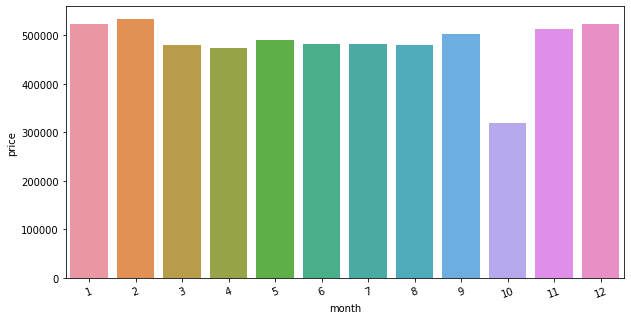

In [20]:
plt.subplots(figsize=[10,5])
sns.barplot(x="month", y="price",data=monthValues)
plt.xticks(rotation=20)

In [21]:
octoberCategory = dfMerge.loc[dfMerge.month == 10].groupby([dfMerge.category_id,dfMerge.transaction_date]).sum()
octoberCategory = octoberCategory.reset_index()
octoberCategory

,category_id,transaction_date,sell_year,month,user_birthday,price,user_age
0,0.0,2021-10-01,1337902,6620,1309278,6947.510000,28624
1,0.0,2021-10-02,1333860,6600,1306010,7138.020000,27850
2,0.0,2021-10-03,1307587,6470,1279697,6783.580000,27890
3,0.0,2021-10-04,1216642,6020,1190283,6551.903656,26359
4,0.0,2021-10-05,1200474,5940,1174381,6357.910000,26093
...,...,...,...,...,...,...,...
62,2.0,2021-10-27,99029,490,97880,3967.290000,1149
63,2.0,2021-10-28,60630,300,59913,2602.820000,717
64,2.0,2021-10-29,101050,500,99833,3617.880000,1217
65,2.0,2021-10-30,80840,400,79885,2898.470000,955


In [22]:
october =  dfMerge.loc[dfMerge.month == 10]
october

,id_product,sell_date,session_id,client_id,transaction_date,sell_year,month,sex,user_birthday,price,category_id,user_age
3,0_2186,2021-10-17 03:27:18.783634,s_105936,c_4597,2021-10-17,2021,10,m,1963,4.20,0.0,58
10,0_423,2021-10-09 23:50:33.907269,s_102501,c_2225,2021-10-09,2021,10,f,1949,1.99,0.0,72
12,0_1368,2021-10-02 10:50:43.188179,s_98886,c_857,2021-10-02,2021,10,m,1985,5.13,0.0,36
14,0_1207,2021-10-12 23:22:51.290635,s_103927,c_648,2021-10-12,2021,10,m,1976,16.99,0.0,45
17,0_1452,2021-10-15 10:07:12.401758,s_105078,c_6297,2021-10-15,2021,10,f,1969,13.77,0.0,52
...,...,...,...,...,...,...,...,...,...,...,...,...
336767,0_1159,2021-10-25 11:55:26.814430,s_109915,c_772,2021-10-25,2021,10,f,1996,7.99,0.0,25
336772,0_1008,2021-10-24 18:24:48.407163,s_109564,c_4468,2021-10-24,2021,10,f,1983,4.73,0.0,38
336796,0_1526,2021-10-05 16:45:36.045702,s_100453,c_6341,2021-10-05,2021,10,m,1975,6.62,0.0,46
336806,0_153,2021-10-17 12:47:22.803642,s_106129,c_682,2021-10-17,2021,10,f,1974,3.99,0.0,47


In [23]:
octoberCategory = october.groupby(['category_id','transaction_date']).sum()
octoberCategory

sell_year  month  user_birthday        price  \
category_id transaction_date                                                 
0.0         2021-10-01          1337902   6620        1309278  6947.510000   
            2021-10-02          1333860   6600        1306010  7138.020000   
            2021-10-03          1307587   6470        1279697  6783.580000   
            2021-10-04          1216642   6020        1190283  6551.903656   
            2021-10-05          1200474   5940        1174381  6357.910000   
...                                 ...    ...            ...          ...   
2.0         2021-10-27            99029    490          97880  3967.290000   
            2021-10-28            60630    300          59913  2602.820000   
            2021-10-29           101050    500          99833  3617.880000   
            2021-10-30            80840    400          79885  2898.470000   
            2021-10-31            82861    410          81888  3219.380000   

                              user_age  
category_id transaction_date            
0.0         2021-10-01           28624  
            2021-10-02           27850  
            2021-10-03           27890  
            2021-10-04           26359  
            2021-10-05           26093  
...                                ...  
2.0         2021-10-27            1149  
            2021-10-28             717  
            2021-10-29            1217  
            2021-10-30             955  
            2021-10-31             973  

[67 rows x 5 columns]

In [24]:
dfMerge.head(1)

,id_product,sell_date,session_id,client_id,transaction_date,sell_year,month,sex,user_birthday,price,category_id,user_age
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,2021-04-10,2021,4,f,1977,4.99,0.0,44


In [144]:
octDf = dfMerge.loc[dfMerge.month == 10, ['transaction_date', 'price', 'category_id']]
octDf = octDf.groupby([octDf.transaction_date, 'category_id']).agg({'price':['sum']}).reset_index()
octDf.columns = ['date', 'category', 'ca']
octDf.loc[octDf.category =='0.0', 'category'] = 0
octDf.loc[octDf.category =='1.0', 'category'] = 1
octDf.loc[octDf.category =='2.0', 'category'] = 2
octDf['day'] = pd.DatetimeIndex(octDf['date']).day
octDf  = octDf[['day','category','ca']]
octDf.head()

,day,category,ca
0,1,0,6947.51
1,1,1,7003.79
2,1,2,2958.06
3,2,0,7138.02
4,2,2,1895.13


In [26]:
df = pd.pivot_table(octDf, columns=['category'], index=['day']).reset_index()
df.columns = ['date', 'cat_0', 'cat_1', 'cat_2']
df = df[['date','cat_0','cat_1','cat_2']]
df.head(1)

,date,cat_0,cat_1,cat_2
0,1,6947.51,7003.79,2958.06


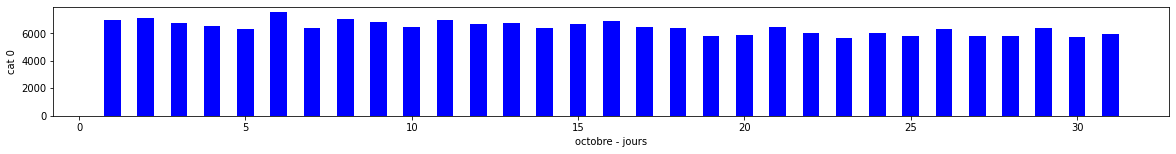

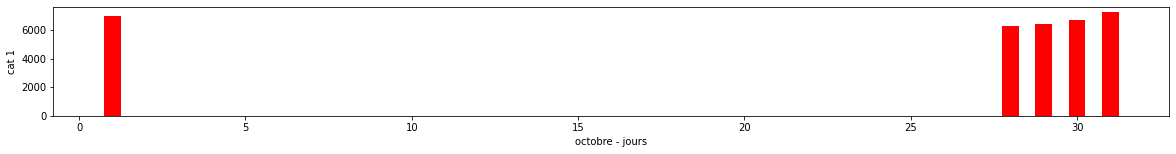

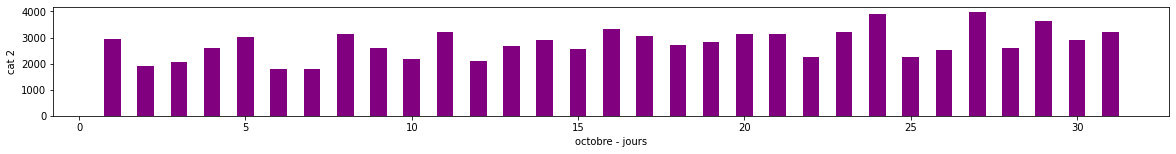

In [27]:
color=['blue', 'red', 'purple']
for i, cat in enumerate([0,1,2]):
    plt.figure(figsize=(44,2))
    plt.subplot(1,2,2)
    plt.bar(df['date'], df[f'cat_{cat}'], width=0.5, color=color[i])
    plt.xlabel('octobre - jours')
    plt.ylabel(f'cat {cat}')
    plt.show()

In [28]:
dfWtOctober = finalDf
dfWtOctober.head()

,id_product,sell_date,session_id,client_id,transaction_date,sell_year,month,sex,user_birthday,price,category_id
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,2021-04-10,2021,4,f,1977,4.99,0.0
1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277,2022-02-03,2022,2,f,2000,65.75,2.0
2,1_374,2021-09-23 15:13:46.938559,s_94290,c_4270,2021-09-23,2021,9,f,1979,10.71,1.0
3,0_2186,2021-10-17 03:27:18.783634,s_105936,c_4597,2021-10-17,2021,10,m,1963,4.20,0.0
4,0_1351,2021-07-17 20:34:25.800563,s_63642,c_1242,2021-07-17,2021,7,f,1980,8.99,0.0
...,...,...,...,...,...,...,...,...,...,...,...
336811,1_671,2021-05-28 12:35:46.214839,s_40720,c_3454,2021-05-28,2021,5,m,1969,31.99,1.0
336812,0_759,2021-06-19 00:19:23.917703,s_50568,c_6268,2021-06-19,2021,6,m,1991,22.99,0.0
336813,0_1256,2021-03-16 17:31:59.442007,s_7219,c_4137,2021-03-16,2021,3,f,1968,11.03,0.0
336814,2_227,2021-10-30 16:50:15.997750,s_112349,c_5,2021-10-30,2021,10,f,1994,50.99,2.0


In [149]:
dfWtOctober = dfWtOctober[dfWtOctober.month != 10]
dfWtOctober.loc[dfWtOctober.category_id =='0.0', 'category_id'] = 0
dfWtOctober.loc[dfWtOctober.category_id =='1.0', 'category_id'] = 1
dfWtOctober.loc[dfWtOctober.category_id =='2.0', 'category_id'] = 2
dfWtOctober.head()

,id_product,sell_date,session_id,client_id,transaction_date,sell_year,month,sex,user_birthday,price,category_id,user_age,binned,bins
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,2021-04-10,2021,4,f,1977,4.99,0.0,44,2,2
1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277,2022-02-03,2022,2,f,2000,65.75,2.0,22,1,1
2,1_374,2021-09-23 15:13:46.938559,s_94290,c_4270,2021-09-23,2021,9,f,1979,10.71,1.0,42,2,2
4,0_1351,2021-07-17 20:34:25.800563,s_63642,c_1242,2021-07-17,2021,7,f,1980,8.99,0.0,41,2,2
5,0_1085,2021-09-15 05:47:48.215162,s_90139,c_2526,2021-09-15,2021,9,f,1982,3.99,0.0,39,2,2


In [30]:
dfWtOctober.to_csv("data_values_clear/correction_merge_V2.csv", index = False, header=True)

In [148]:
dfWtOctober['user_age'] = dfWtOctober['sell_year'] - dfWtOctober['user_birthday']
dfWtOctober.head()

<ipython-input-148-510ebdd5ac2a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfWtOctober['user_age'] = dfWtOctober['sell_year'] - dfWtOctober['user_birthday']


,id_product,sell_date,session_id,client_id,transaction_date,sell_year,month,sex,user_birthday,price,category_id,user_age,binned,bins
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,2021-04-10,2021,4,f,1977,4.99,0.0,44,2,2
1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277,2022-02-03,2022,2,f,2000,65.75,2.0,22,1,1
2,1_374,2021-09-23 15:13:46.938559,s_94290,c_4270,2021-09-23,2021,9,f,1979,10.71,1.0,42,2,2
4,0_1351,2021-07-17 20:34:25.800563,s_63642,c_1242,2021-07-17,2021,7,f,1980,8.99,0.0,41,2,2
5,0_1085,2021-09-15 05:47:48.215162,s_90139,c_2526,2021-09-15,2021,9,f,1982,3.99,0.0,39,2,2


In [146]:
bins = [0,20,30,50,100]
#labels = ['jeune','middle_age','senior']
labels = [0,1,2,3]
dfWtOctober['binned'] = pd.cut(dfWtOctober['user_age'], bins=bins, labels=labels)
dfWtOctober['binned']
dfWtOctober['binned'] = dfWtOctober['binned'].astype('int')
dfWtOctober.head()

<ipython-input-146-47d299a4f29c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfWtOctober['binned'] = pd.cut(dfWtOctober['user_age'], bins=bins, labels=labels)
<ipython-input-146-47d299a4f29c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfWtOctober['binned'] = dfWtOctober['binned'].astype('int')


,id_product,sell_date,session_id,client_id,transaction_date,sell_year,month,sex,user_birthday,price,category_id,user_age,binned,bins
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,2021-04-10,2021,4,f,1977,4.99,0.0,44,2,2
1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277,2022-02-03,2022,2,f,2000,65.75,2.0,22,1,1
2,1_374,2021-09-23 15:13:46.938559,s_94290,c_4270,2021-09-23,2021,9,f,1979,10.71,1.0,42,2,2
4,0_1351,2021-07-17 20:34:25.800563,s_63642,c_1242,2021-07-17,2021,7,f,1980,8.99,0.0,41,2,2
5,0_1085,2021-09-15 05:47:48.215162,s_90139,c_2526,2021-09-15,2021,9,f,1982,3.99,0.0,39,2,2


In [145]:
dfWtOctober.loc[dfWtOctober.binned == 0 , 'binned'] = 'jeune'
dfWtOctober.loc[dfWtOctober.binned == 1 , 'binned'] = 'jeune'
dfWtOctober.loc[dfWtOctober.binned == 2 , 'binned'] = 'age_moyen'
dfWtOctober.loc[dfWtOctober.binned == 3 , 'binned'] = 'senior'
dfWtOctober.head()

/usr/local/lib/python3.8/site-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


,id_product,sell_date,session_id,client_id,transaction_date,sell_year,month,sex,user_birthday,price,category_id,user_age,binned,bins
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,2021-04-10,2021,4,f,1977,4.99,0.0,44,age_moyen,2
1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277,2022-02-03,2022,2,f,2000,65.75,2.0,22,jeune,1
2,1_374,2021-09-23 15:13:46.938559,s_94290,c_4270,2021-09-23,2021,9,f,1979,10.71,1.0,42,age_moyen,2
4,0_1351,2021-07-17 20:34:25.800563,s_63642,c_1242,2021-07-17,2021,7,f,1980,8.99,0.0,41,age_moyen,2
5,0_1085,2021-09-15 05:47:48.215162,s_90139,c_2526,2021-09-15,2021,9,f,1982,3.99,0.0,39,age_moyen,2


In [50]:
bins = [0,20,30,50,100]
#labels = ['jeune','middle_age','senior']
labels = [0,1,2,3]
dfWtOctober['bins'] = pd.cut(dfWtOctober['user_age'], bins=bins, labels=labels)
dfWtOctober['bins']
dfWtOctober['bins'] = dfWtOctober['bins'].astype('int')
dfWtOctober.head(5)

<ipython-input-50-f0360ae7112a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfWtOctober['bins'] = pd.cut(dfWtOctober['user_age'], bins=bins, labels=labels)
<ipython-input-50-f0360ae7112a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfWtOctober['bins'] = dfWtOctober['bins'].astype('int')


,id_product,sell_date,session_id,client_id,transaction_date,sell_year,month,sex,user_birthday,price,category_id,user_age,binned,bins
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,2021-04-10,2021,4,f,1977,4.99,0.0,44,age_moyen,2
1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277,2022-02-03,2022,2,f,2000,65.75,2.0,22,jeune,1
2,1_374,2021-09-23 15:13:46.938559,s_94290,c_4270,2021-09-23,2021,9,f,1979,10.71,1.0,42,age_moyen,2
4,0_1351,2021-07-17 20:34:25.800563,s_63642,c_1242,2021-07-17,2021,7,f,1980,8.99,0.0,41,age_moyen,2
5,0_1085,2021-09-15 05:47:48.215162,s_90139,c_2526,2021-09-15,2021,9,f,1982,3.99,0.0,39,age_moyen,2


In [67]:
t = dfWtOctober.copy()
t = t.loc[t['sell_year'] == 2021]
clientSpend = dfWtOctober.groupby(['client_id']).sum().reset_index().rename(columns={"price":'spend_annual'})
clientSpend = clientSpend[['client_id','spend_annual']]
dt = clientSpend.merge(t, left_on='client_id', right_on='client_id')
dt = dt[['client_id','spend_annual','user_age','binned','bins']]
dt = dt.drop_duplicates()
dt = dt.loc[dt['user_age'] >= 20] 
spendAnnual = dt
spendAnnual = spendAnnual.loc[spendAnnual['spend_annual'] <= 54441.92]
spendAnnual.head(10)


,client_id,spend_annual,user_age,binned,bins
0,c_1,292.66,66,senior,3
18,c_10,586.18,65,senior,3
46,c_100,222.87,29,jeune,1
52,c_1000,928.05,55,senior,3
91,c_1001,1009.67,39,age_moyen,2
134,c_1002,209.06,39,age_moyen,2
147,c_1003,482.33,39,age_moyen,2
180,c_1004,475.77,48,age_moyen,2
205,c_1005,459.72,80,senior,3
229,c_1006,1728.67,42,age_moyen,2


([<matplotlib.axis.YTick at 0x7ff6dee9b520>,
 [Text(0, 1, 'jeune'), Text(0, 2, 'age_moyen'), Text(0, 3, 'senior')])

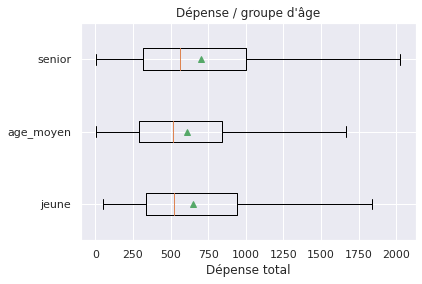

In [114]:
dic = {}

for i in spendAnnual.bins.unique():
    dic[i] = list(spendAnnual.loc[spendAnnual.bins == i,'spend_annual'])

plt.boxplot([
    dic[0],
    dic[1],
    dic[2]
], vert=False, showmeans=True, showfliers=False)
plt.title("Dépense / groupe d'âge")
plt.xlabel("Dépense total")
plt.yticks([1,2,3], ['jeune', 'age_moyen', 'senior'])


[]

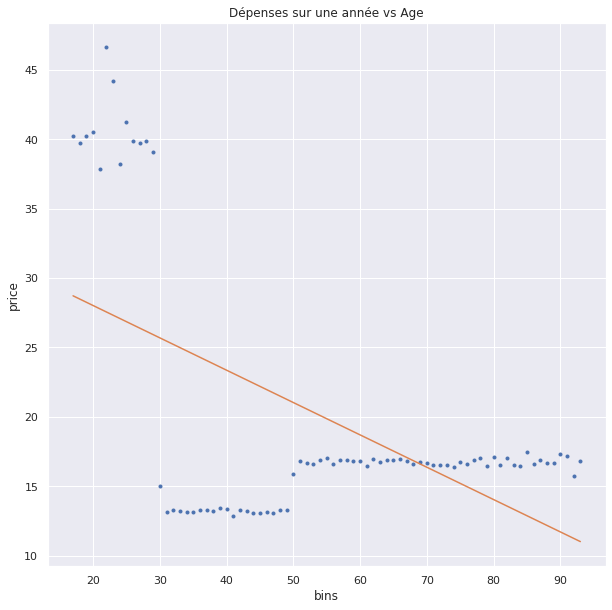

In [119]:
X = gp['user_age'].values[:,np.newaxis]
# target data is array of shape (n,) 
y = gp['price'].values

modelRegressionLinear = LinearRegression()
modelRegressionLinear.fit(X, y)
RCarre = modelRegressionLinear.score(X, y)
sns.set_theme()
sns.set_style("darkgrid")
plt.figure(figsize=(10,10))
plt.plot(X, y, '.')
plt.plot(X, modelRegressionLinear.predict(X))
plt.title("Dépenses sur une année vs Age")
plt.xlabel('bins')
plt.ylabel("price")
plt.plot()

In [116]:
binsAge = dfWtOctober.copy()
binsAge['b_a'] = pd.cut(binsAge['user_age'], [0,20,30,40,50,60], labels=['<20', '20-30', '30-40', '40-50', '50+'])
binsAge = binsAge[['b_a','price']]
binsAgeGp  = binsAge.groupby('b_a').mean().reset_index()
binsAgeGp


,b_a,price
0,<20,40.162968
1,20-30,35.335540
2,30-40,13.242095
3,40-50,13.259879
4,50+,16.770653


In [124]:
test = dfWtOctober.copy();
test = test.groupby(['user_age','month']).mean()['price'].reset_index()
test

,user_age,month,price
0,17,3,37.236376
1,17,4,43.179862
2,17,5,42.065232
3,17,6,39.962853
4,17,7,45.513201
...,...,...,...
831,92,9,15.821538
832,92,11,13.202500
833,92,12,16.790000
834,93,1,17.160000


[]

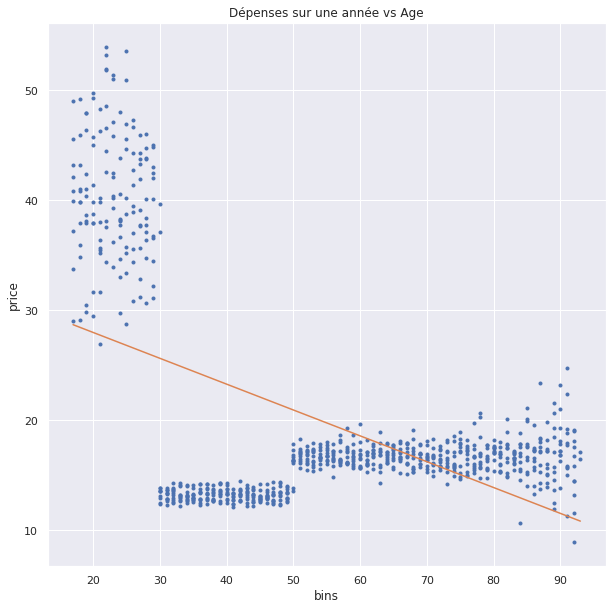

In [125]:
X = test['user_age'].values[:,np.newaxis]
# target data is array of shape (n,) 
y = test['price'].values

modelRegressionLinear = LinearRegression()
modelRegressionLinear.fit(X, y)
RCarre = modelRegressionLinear.score(X, y)
sns.set_theme()
sns.set_style("darkgrid")
plt.figure(figsize=(10,10))
plt.plot(X, y, '.')
plt.plot(X, modelRegressionLinear.predict(X))
plt.title("Dépenses sur une année vs Age")
plt.xlabel('bins')
plt.ylabel("price")
plt.plot()

In [126]:
dfWtOctober.head(5)

,id_product,sell_date,session_id,client_id,transaction_date,sell_year,month,sex,user_birthday,price,category_id,user_age,binned,bins
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,2021-04-10,2021,4,f,1977,4.99,0.0,44,age_moyen,2
1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277,2022-02-03,2022,2,f,2000,65.75,2.0,22,jeune,1
2,1_374,2021-09-23 15:13:46.938559,s_94290,c_4270,2021-09-23,2021,9,f,1979,10.71,1.0,42,age_moyen,2
4,0_1351,2021-07-17 20:34:25.800563,s_63642,c_1242,2021-07-17,2021,7,f,1980,8.99,0.0,41,age_moyen,2
5,0_1085,2021-09-15 05:47:48.215162,s_90139,c_2526,2021-09-15,2021,9,f,1982,3.99,0.0,39,age_moyen,2


In [129]:
panier = pd.DataFrame(dfWtOctober.groupby(["client_id", "user_age", "binned"]).mean()["price"]).reset_index()
panier.rename(columns={"price": "panier_moyen"}, inplace=True)
panier["panier_moyen"]=panier["panier_moyen"]
panier

,client_id,user_age,binned,panier_moyen
0,c_1,66,senior,15.926111
1,c_1,67,senior,5.990000
2,c_10,65,senior,20.935000
3,c_100,29,jeune,37.145000
4,c_1000,55,senior,16.663590
...,...,...,...,...
15784,c_997,28,jeune,14.777500
15785,c_998,20,jeune,45.910833
15786,c_998,21,jeune,106.457500
15787,c_999,57,senior,13.775333


[]

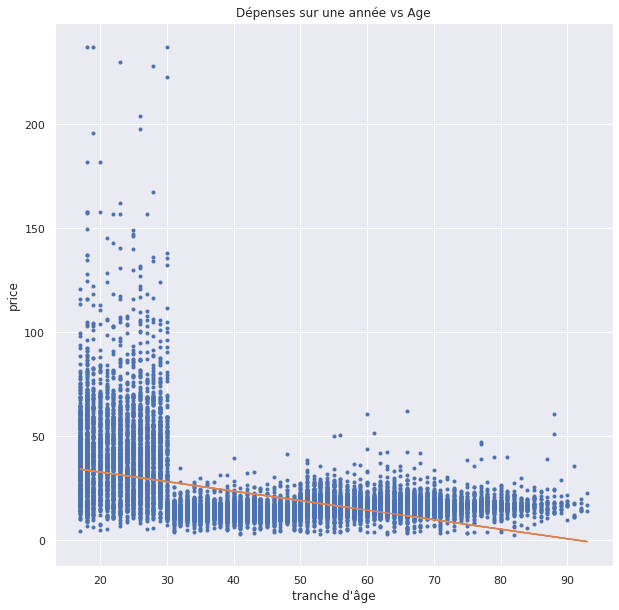

In [133]:
X = panier['user_age'].values[:,np.newaxis]
# target data is array of shape (n,) 
y = panier['panier_moyen'].values

modelRegressionLinear = LinearRegression()
modelRegressionLinear.fit(X, y)
RCarre = modelRegressionLinear.score(X, y)
sns.set_theme()
sns.set_style("darkgrid")
plt.figure(figsize=(10,10))
plt.plot(X, y, '.')
plt.plot(X, modelRegressionLinear.predict(X))
plt.title("Dépenses sur une année vs Age")
plt.xlabel("tranche d'âge")
plt.ylabel("price")
plt.plot()

p_value: 1.0
Etat carré 0    0.224327
Name: n2, dtype: float64


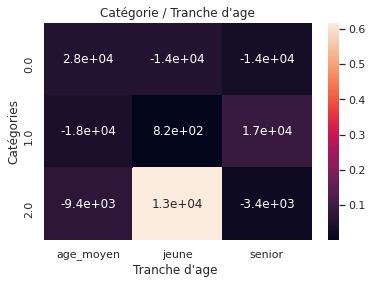

In [142]:
c = dfWtOctober[["category_id", "binned"]].pivot_table(index="category_id",
                              columns="binned",
                              aggfunc=len)
cont =  c.copy()
tx = dfWtOctober["category_id"].value_counts()
ty = dfWtOctober["binned"].value_counts()
cont.loc[:, "Total"] = tx
cont.loc["total", :] = ty
cont.loc["total", "Total"] = len(dfWtOctober)
tx = pd.DataFrame(tx)
ty = pd.DataFrame(ty)
tx.columns=["foo"]
ty.columns=["foo"]
n = len(dfWtOctober)
indep =  tx.dot(ty.T)/n
indep.sort_index(axis=1, inplace=True)
indep.sort_index(inplace=True)
mesure = (c-indep)**2/indep
xi_n = mesure.sum().sum()
ddl = (len(c)-1)*(len(c.columns)-1)
#pvalue = np.chi2_contingency(c)[1]
sns.heatmap(mesure/xi_n, annot=c-indep)
plt.title("Catégorie / Tranche d'age")
plt.xlabel("Tranche d'age ")
plt.ylabel("Catégories", fontsize=12)


chi2, p_value, degre_liberte, st_exp = chi2_contingency(indep)

import pingouin as pg
anovaCalculation = dfWtOctober.anova(dv='category_id', between='binned', detailed=False,
                   effsize='n2')




print("p_value:", round(p_value, 20))
print("Etat carré", anovaCalculation['n2'])